- Using text and word frequency (Bag of Words) to represent sentiment
- Building sentiment classifier using logistic regression and with softmax
- Measuring classification accuracy
- Computing ROC curve and measure classifier effectiveness
- Submitting your results to the Kaggle challenge for movie reviews

In [1]:
pip install tika

  Preparing metadata (setup.py) ... - done
  Created wheel for tika: filename=tika-1.24-py3-none-any.whl size=32893 sha256=8e007dae680748d1ae3f1c31bd910a8bcdc69643fffb35d3b31a03dd63c8fdbc
  Stored in directory: /root/.cache/pip/wheels/ec/2b/38/58ff05467a742e32f67f5d0de048fa046e764e2fbb25ac93f3
Successfully built tika
Note: you may need to restart the kernel to use updated packages.


In [2]:
# import required libraries
from nltk.corpus import stopwords
import re
from tika import parser

import pandas as pd 
from tqdm import tqdm_notebook as tqdm

from sklearn.feature_extraction.text import CountVectorizer

import numpy as np

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 

In [3]:
# function to make words from reviews 
def review_to_words (raw_review):
    # parsing review text 
    review_text = parser.from_buffer("<html>" + raw_review + "</html>")["content"]
    # removing unwanted characters and creating seperate words 
    letters_only = re.sub("[^a-zA-Z]"," ",review_text)
    words = letters_only.lower().split()
    # choosing only meaningful words removing stop words 
    stops = set(stopwords.words("english"))
    # returning only meaning full words 
    meaningful_words = [w for w in words if not w in stops]
    return(" ".join( meaningful_words ))

In [4]:
# importing training data from given dataset.
train = pd.read_csv ("../input/kumarmanoj-bag-of-words-meets-bags-of-popcorn/labeledTrainData.tsv",sep='\t',on_bad_lines='skip', header = 0 ,  quoting = 3)
# shape of loaded data 
print(train.shape)
print(train.columns.values)

# total size of reviews present in dataset
num_reviews = train["review"].size
# getting meaningfull words from dataset reviews 
clean_train_reviews = []
for i in tqdm(range( 0, num_reviews )):
    clean_train_reviews.append( review_to_words( train["review"][i] ) )

(25000, 3)
['id' 'sentiment' 'review']


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # This is added back by InteractiveShellApp.init_path()


  0%|          | 0/25000 [00:00<?, ?it/s]

2022-04-23 10:00:47,302 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server/1.24/tika-server-1.24.jar to /tmp/tika-server.jar.
2022-04-23 10:00:49,698 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server/1.24/tika-server-1.24.jar.md5 to /tmp/tika-server.jar.md5.
2022-04-23 10:00:50,461 [MainThread  ] [WARNI]  Failed to see startup log message; retrying...


In [5]:
# cevtorizing each word
vectorizer = CountVectorizer(analyzer = "word", \
 tokenizer = None, \
 preprocessor = None, \
 stop_words = None, \
 max_features = 5000)

In [6]:
# extracting features from clean reviews using vectorizer 
train_data_features = vectorizer.fit_transform(clean_train_reviews)
# converting in an array 
train_data_features = train_data_features.toarray()
print(train_data_features.shape) 

(25000, 5000)


In [7]:
# printing out the words 
vocab = vectorizer.get_feature_names()
print("size %d %s " % (len(vocab), vocab))

size 5000 ['abandoned', 'abc', 'abilities', 'ability', 'able', 'abraham', 'absence', 'absent', 'absolute', 'absolutely', 'absurd', 'abuse', 'abusive', 'abysmal', 'academy', 'accent', 'accents', 'accept', 'acceptable', 'accepted', 'access', 'accident', 'accidentally', 'accompanied', 'accomplished', 'according', 'account', 'accuracy', 'accurate', 'accused', 'achieve', 'achieved', 'achievement', 'acid', 'across', 'act', 'acted', 'acting', 'action', 'actions', 'activities', 'actor', 'actors', 'actress', 'actresses', 'acts', 'actual', 'actually', 'ad', 'adam', 'adams', 'adaptation', 'adaptations', 'adapted', 'add', 'added', 'adding', 'addition', 'adds', 'adequate', 'admire', 'admit', 'admittedly', 'adorable', 'adult', 'adults', 'advance', 'advanced', 'advantage', 'adventure', 'adventures', 'advertising', 'advice', 'advise', 'affair', 'affect', 'affected', 'afford', 'aforementioned', 'afraid', 'africa', 'african', 'afternoon', 'afterwards', 'age', 'aged', 'agent', 'agents', 'ages', 'aging', 

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [8]:
# count all the features 
dist = np.sum(train_data_features, axis=0)
# printing words with features 
for tag, count in zip(vocab, dist):    
    print("%d, %s" % (count, tag)) 

187, abandoned
125, abc
108, abilities
454, ability
1259, able
85, abraham
116, absence
83, absent
352, absolute
1485, absolutely
306, absurd
192, abuse
91, abusive
98, abysmal
297, academy
485, accent
203, accents
300, accept
130, acceptable
144, accepted
92, access
318, accident
200, accidentally
88, accompanied
124, accomplished
296, according
186, account
81, accuracy
284, accurate
123, accused
179, achieve
139, achieved
124, achievement
90, acid
971, across
1251, act
660, acted
6494, acting
3355, action
311, actions
83, activities
2389, actor
4488, actors
1219, actress
369, actresses
394, acts
793, actual
4240, actually
148, ad
303, adam
98, adams
454, adaptation
80, adaptations
154, adapted
810, add
440, added
166, adding
347, addition
337, adds
113, adequate
124, admire
621, admit
134, admittedly
101, adorable
511, adult
376, adults
101, advance
90, advanced
153, advantage
510, adventure
204, adventures
91, advertising
259, advice
90, advise
346, affair
93, affect
113, affected


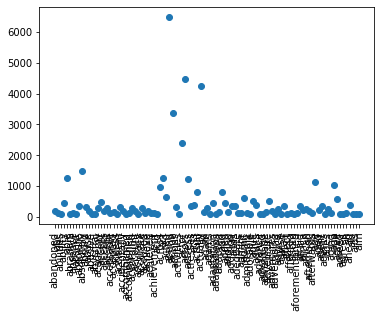

In [9]:
# visualizing the words first 100
import matplotlib.pyplot as plt
plt.scatter(vocab[0:99], dist[0:99])
plt.xticks(vocab[0:99], rotation='vertical')
plt.show()

In [10]:
# learning rate for logistic regression model 
learning_rate = 0.1
training_epochs = 10
# sigmoid function to train the model 
def sigmoid(x):
    return 1. / (1. + np.exp(-x))

In [11]:
# creating a placeholder and a variable for training a model 
Y = tf.placeholder(shape=(None), dtype=tf.float32, name ="y")
w = tf.Variable([0.] * (len(train_data_features)+1), name="w", trainable=True)

In [12]:
# making Xs dictionary of all features 
ys = train['sentiment'].values
Xs = {}
for i in range(train_data_features.shape[1]):
    Xs["X"+str(i)] = tf.placeholder(tf.float32, shape=(None,),name="x"+str(i))

In [13]:
linear = w[0]
# fit the model
for i in range(0, train_data_features.shape[1]):
    linear = linear + (w[i+1] * Xs["X"+str(i)])
y_model = tf.sigmoid(linear)

In [14]:
# reducing the cost or loss of the model 
cost = tf.reduce_mean(-tf.log(y_model * Y + (1 - y_model) * (1 - Y)))
# optimizing using GDO optimizer
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
# reducing the cost or loss of the model 
cost = tf.reduce_mean(-tf.log(y_model * Y + (1 - y_model) * (1 - Y)))
# optimizing using GDO optimizer
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
# creating a session to train model for given epochs
saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    prev_err = 0.  # adding up the error in a variable 
    for epoch in tqdm(range(training_epochs)):
        feed_dict = {} 
        # training on each features  and calculating cost or loss 
        for i in range(train_data_features.shape[1]):
            feed_dict[Xs["X"+str(i)]] = train_data_features[:, i,None].reshape(len(train_data_features))
        feed_dict[Y] = ys 
        err, _ = sess.run([cost, train_op], feed_dict=feed_dict)
        # print epochs
        print(epoch, err)
        # early stoping for overfit problem 
        if abs(prev_err - err) < 0.0001:
            break
        prev_err = err
    w_val = sess.run(w, feed_dict)
    save_path = saver.save(sess, "./en-netflix-binary-sentiment.ckpt")
print(w_val)
print(np.max(w_val))    

2022-04-23 10:06:55.125106: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


  0%|          | 0/10 [00:00<?, ?it/s]

0 0.693146
1 0.68367267
2 0.67517424
3 0.66737765
4 0.6601467
5 0.6533886
6 0.64703435
7 0.64103085
8 0.6353369
9 0.62991923
[ 0.00639062 -0.00018599  0.00090928 ...  0.          0.
  0.        ]
0.0699149


In [15]:
# function to predict on test data 
def predict(test_review, vocab, weights, threshold=0.5):
    test_review_c = review_to_words(test_review)
    # tokenize test data 
    n_vectorizer = CountVectorizer(analyzer = "word", \
 tokenizer = None, \
 preprocessor = None, \
 stop_words = None, \
 max_features = 5000)
    # extract features of test data 
    ex_data_features = n_vectorizer.fit_transform([test_review_c])
    ex_data_features = ex_data_features.toarray()
    test_vocab = n_vectorizer.get_feature_names()
    test_vocab_counts = ex_data_features.reshape(ex_data_features.shape[1])
    ind_dict = dict((k, i) for i, k in enumerate(vocab))
    test_ind_dict = dict((k, i) for i, k in enumerate(test_vocab))
    inter = set(ind_dict).intersection(test_vocab)
    indices = [ ind_dict[x] for x in inter ]
    test_indices = [test_ind_dict[x] for x in inter]
    test_feature_vec = np.zeros(train_data_features.shape[1])
    for i in range(len(indices)):
        
        test_feature_vec[indices[i]] = test_vocab_counts[test_indices[i]]
    test_linear = weights[0]
    for i in range(0, train_data_features.shape[1]):
        test_linear = test_linear + (weights[i+1] * test_feature_vec[i])
    y_test = sigmoid(test_linear)
    # return predicted label having high accuracy
    return np.greater(y_test, threshold).astype(float)

In [16]:
# test model with new reviews 
new_neg_review = "Man, this movie really sucked. It was terrible. I could not possibly watch this movie again!"
new_pos_review = "I think that this is a fantastic movie, it really "
# printing predicted results 
predict(new_neg_review, vocab, w_val),predict(new_pos_review, vocab, w_val)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(0.0, 0.0)

In [17]:
# testing model on test directory 
from os import listdir
from os.path import isfile, join
pos_test_path = "../input/test-reviews/test/pos/"
neg_test_path = "../input/test-reviews/test/neg/"
only_pos_files = [f for f in listdir(pos_test_path) if isfile(join(pos_test_path, f))]
only_neg_files = [f for f in listdir(neg_test_path) if isfile(join(neg_test_path, f))]
only_pos_file_contents = []
# read all the files from positive reviews test data 
for i in range(0, len(only_pos_files)):
    with open(pos_test_path + only_pos_files[i], 'r') as file:
        r_data = file.read()
        # append review to negative list 
        only_pos_file_contents.append(r_data)
only_neg_file_contents = []
# reading negative reviews 
for i in range(0, len(only_neg_files)):
    with open(neg_test_path + only_neg_files[i], 'r') as file:
        r_data = file.read()
        # append the negatice review to negative list 
        only_neg_file_contents.append(r_data)
predictions_test = np.zeros(len(only_pos_file_contents) * 2)

In [18]:
TP = 0.
TN = 0.
FP = 0.
FN = 0. 
# calculating evaluation metrices 
# False negatice , true negative , false positve , ture positive 
for i in tqdm(range(0, len(only_pos_file_contents))):
    # pridicting and storing data in a list for TP and FN 
    sent = predict(only_pos_file_contents[i], vocab, w_val)
    predictions_test[i] = sent
    if sent == 1.:
        TP += 1
    elif sent == 0.:
        FN += 1
# same process to calcuate FP and TN
for i in tqdm(range(0, len(only_neg_file_contents))):
    sent = predict(only_neg_file_contents[i], vocab, w_val)
    predictions_test[len(only_neg_file_contents)+i] = sent
    if sent == 0.:
        TN += 1
    elif sent == 1.:
        FP += 1


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys


  0%|          | 0/12500 [00:00<?, ?it/s]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  app.launch_new_instance()


  0%|          | 0/12500 [00:00<?, ?it/s]

In [19]:
# calculating precision  and recall metrices 
precision = (TP) / (TP + FP)
recall = (TP) / (TP + FN)
print("precision %f recall %f" % (precision, recall))
print(TP)
print(TN)
print(FP)
print(FN)

precision 0.764273 recall 0.731440
9143.0
9680.0
2820.0
3357.0


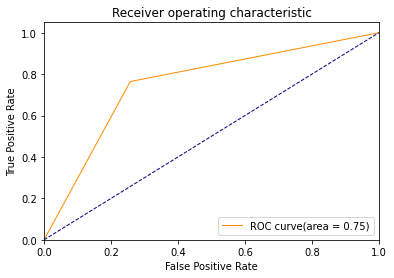

In [20]:
# Generate ROC-AUC curve 
from sklearn.metrics import roc_curve, auc
# storing prediction output to list for positive reviews 
outcome_test = np.ones(len(only_pos_files))
# storing outcome for negative reviews 
outcome_test = np.append(outcome_test, np.zeros(len(only_neg_files)))
# calculate roc curve using fpr and tpr 
fpr, tpr, thresholds = roc_curve(predictions_test, outcome_test)
roc_auc = auc(fpr, tpr)
# plot roc curve 
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve(area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [21]:
# storing positive and negatice sentiments in list by checking encoded labels 
lab_mat = []
for i in range(len(train['sentiment'])):
    if train['sentiment'][i] == 1.0:
        lab_mat = lab_mat + [[0., 1.]]
    elif train['sentiment'][i] == 0.0:
        lab_mat = lab_mat + [[1., 0.]]
labels = np.matrix(lab_mat)
xs = train_data_features.astype(float)
train_size, num_features = xs.shape
print(xs.shape)
print(labels.shape)

(25000, 5000)
(25000, 2)


In [22]:
arr = np.arange(xs.shape[0])
np.random.shuffle(arr)
xs = xs[arr, :]
labels = labels[arr, :]

In [23]:
# generating model using softmax 
def softmax_feat_vec_from_review(test_review, vocab):
    n_vectorizer = CountVectorizer(analyzer = "word", \
 tokenizer = None, \
 preprocessor = None, \
 stop_words = None, \
 max_features = 5000)   
    
    ex_data_features = n_vectorizer.fit_transform([test_review])
    ex_data_features = ex_data_features.toarray()
    test_vocab = n_vectorizer.get_feature_names()
    test_vocab_counts = ex_data_features.reshape(ex_data_features.shape[1])

    ind_dict = dict((k, i) for i, k in enumerate(vocab))
    test_ind_dict = dict((k, i) for i, k in enumerate(test_vocab))
    inter = set(ind_dict).intersection(test_vocab)
    indices = [ ind_dict[x] for x in inter ]
    test_indices = [test_ind_dict[x] for x in inter]    
    test_feature_vec = np.zeros(train_data_features.shape[1])
    for i in range(len(indices)):
        test_feature_vec[indices[i]] = test_vocab_counts[test_indices[i]]
    return test_feature_vec

In [24]:
test_reviews = []
clean_test_reviews = []
test_reviews.extend(only_pos_file_contents)
test_reviews.extend(only_neg_file_contents)
for i in tqdm(range(len(test_reviews))):
    test_review_c = review_to_words(test_reviews[i])
    clean_test_reviews.append(test_review_c) 
test_xs = np.zeros((len(clean_test_reviews), num_features)) 
for i in tqdm(range(len(clean_test_reviews))): 
    test_xs[i] = softmax_feat_vec_from_review(clean_test_reviews[i], vocab)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


  0%|          | 0/25000 [00:00<?, ?it/s]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if __name__ == '__main__':


  0%|          | 0/25000 [00:00<?, ?it/s]

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [25]:
from sklearn.metrics import accuracy_score
learning_rate = 0.01
training_epochs = 10
num_labels = 2
batch_size = 100
X = tf.placeholder("float", shape=[None, num_features])
Y = tf.placeholder("float", shape=[None, num_labels])
W = tf.Variable(tf.zeros([num_features, num_labels]))
b = tf.Variable(tf.zeros([num_labels]))
y_model = tf.nn.softmax(tf.matmul(X, W) + b)
cost = -tf.reduce_sum(Y * tf.log(tf.maximum(y_model, 1e-15)))
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) 
saver = tf.train.Saver()
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    for step in tqdm(range(training_epochs * train_size // batch_size)):
        offset = (step * batch_size) % train_size
        batch_xs = xs[offset:(offset + batch_size), :]
        batch_labels = labels[offset:(offset + batch_size)]
        err, _ = sess.run([cost, train_op], feed_dict={X: batch_xs, Y:batch_labels})
        #print (step, err)
    W_val = sess.run(W)
    print('w', W_val)
    b_val = sess.run(b)
    print('b', b_val)
    #print("accuracy", accuracy_score.eval(feed_dict={X: test_xs, Y: test_labels}))
    save_path = saver.save(sess, "./softmax-sentiment.ckpt")
    print("Model saved in path: %s" % save_path) 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  app.launch_new_instance()


  0%|          | 0/2500 [00:00<?, ?it/s]

w [[-0.21394038  0.21394044]
 [-0.18589504  0.18589498]
 [ 0.02295058 -0.02295056]
 ...
 [ 0.03983909 -0.03983903]
 [ 0.29188234 -0.2918823 ]
 [ 0.08311614 -0.08311615]]
b [ 0.08685792 -0.08686151]
Model saved in path: ./softmax-sentiment.ckpt


In [26]:
# prediction function for softmax model 
def predict_softmax(test_review, vocab):
    test_review_c = review_to_words(test_review)

    n_vectorizer = CountVectorizer(analyzer = "word", \
 tokenizer = None, \
 preprocessor = None, \
 stop_words = None, \
 max_features = 5000)
    ex_data_features = n_vectorizer.fit_transform([test_review_c])
    ex_data_features = ex_data_features.toarray()
    test_vocab = n_vectorizer.get_feature_names()
    test_vocab_counts = ex_data_features.reshape(ex_data_features.shape[1])

    ind_dict = dict((k, i) for i, k in enumerate(vocab))
    test_ind_dict = dict((k, i) for i, k in enumerate(test_vocab))
    inter = set(ind_dict).intersection(test_vocab)
    indices = [ ind_dict[x] for x in inter ]
    test_indices = [test_ind_dict[x] for x in inter]

    test_feature_vec = np.zeros(train_data_features.shape[1])
    for i in range(len(indices)):
        test_feature_vec[indices[i]] = test_vocab_counts[test_indices[i]]
    predict = y_model.eval(feed_dict={X: [test_feature_vec], W: W_val,b: b_val})
    return np.argmax(predict, 1)

Model restored.


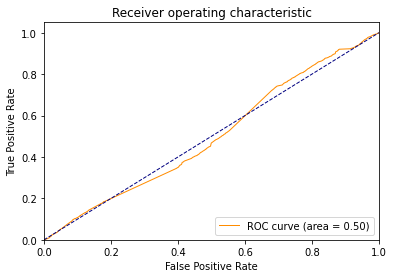

In [27]:
# start a session to train the model using softmax 
test_labels = np.ones(len(only_pos_files))
test_labels = np.append(test_labels, np.zeros(len(only_neg_files)))

saver = tf.train.Saver()
with tf.Session() as sess:
    saver.restore(sess, "./softmax-sentiment.ckpt")
    print("Model restored.")
    predict_vals = np.argmax(y_model.eval(feed_dict={X: test_xs, W: W_val,b: b_val}), 1)
outcome_test = np.argmax(test_xs, 1)
predictions_test = predict_vals
# calculate roc-auc curve and plot the curve 
fpr, tpr, thresholds = roc_curve(predictions_test, outcome_test)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1,label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [28]:
test = pd.read_csv('../input/kumarmanoj-bag-of-words-meets-bags-of-popcorn/testData.tsv',sep='\t',on_bad_lines='skip', header = 0 ,  quoting = 3)

In [29]:
# final output from the model 

num_reviews = len(test["review"])
result = []
for i in tqdm(range(0, num_reviews)):
    r = predict(test["review"][i], vocab, w_val)
    result.append(r)
output = pd.DataFrame( data={"id":test["id"], "sentiment":result} )
output.to_csv( "Bag_of_Words_model.csv", index=False, quoting=3 )

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


  0%|          | 0/25000 [00:00<?, ?it/s]

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
